<h1>Applying Logistic regression on Amazon fine food reviews dataset </h1>
<ol>
    <li>Dataset:Amazon fine food reviews dataset.</li>
    <li>Vectorizers used here are:-Bag of words,Tf-idf,Average Word 2 Vec and Tfidf weighted Word 2 vec.</li>
    <li>Regularizers used here are:-"L1 and L2" regularizations.</li>
    <li>Feature Importance Techniques:Recursive Feature Elimination (RFE) and Cross-validation (RFECV).</li>
    <li>Metrics used here are:-Confusion metrics, Accuracy as a score metric is used here.</li> 
        

In [24]:
#Importing important libraries

%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from datetime import datetime
from scipy.stats import norm
from sklearn import metrics
from nltk.stem.porter import PorterStemmer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from prettytable import PrettyTable





<h3> Connecting to the preproccessed SQLite table</h3>

In [2]:
#Connecting to the SQL table
con = sqlite3.connect('final.sqlite')

#Reading data from the database

Data = pd.read_sql_query("""
SELECT *
FROM Reviews """,con)
Data.shape

(364171, 12)

In [3]:
# Drop index column
Data.drop(columns=['index'],inplace=True)


In [4]:
#Converting the Time column into standard Date-time standard

Data["Time"]=pd.to_datetime(Data.Time)
Data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,1970-01-01 00:00:00.939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1970-01-01 00:00:01.194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1970-01-01 00:00:01.191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1970-01-01 00:00:01.076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...
4,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1970-01-01 00:00:01.018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...


In [5]:
#Setting Time column as index of the dataframe 
Data.set_index("Time",inplace=True)

#Sampling the above data
Sorted=Data.sort_index()

In [6]:
Sorted.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,CleanedText
Time,,,,,,,,,,
1970-01-01 00:00:00.939340800,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1970-01-01 00:00:00.940809600,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
1970-01-01 00:00:00.944092800,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
1970-01-01 00:00:00.944438400,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
1970-01-01 00:00:00.946857600,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


In [7]:
#Sampling the above data

Sampled_data=Sorted.sample(n=50000,replace='False')
Sample_sort=Sampled_data.sort_index()
Sample_sort.shape


(50000, 10)

In [8]:
#Sampling the above data for implementing the TF-idf technique

Samp_data=Sorted.sample(n=8000,replace='False')
TF_sort=Samp_data.sort_index()
TF_sort.shape


(8000, 10)

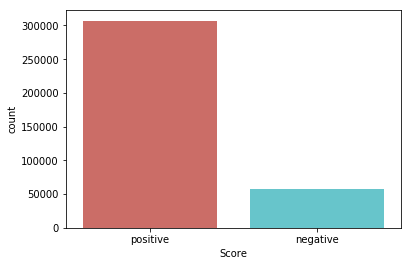

<Figure size 432x288 with 0 Axes>

In [9]:
#Setting up the class label variables

Class=TF_sort["Score"]
label=Sample_sort["Score"]
sns.countplot(x="Score",data=Sorted,palette="hls")
plt.show()
plt.savefig("count_plot")


In [10]:
#Dropping the Score column which are the actual class labels of the dataset
TF_sort.drop(columns=['Score'],inplace=True)
TF_sort.shape

(8000, 9)

In [11]:
#Dropping the Score column from the sampled_set which are the actual class labels of the dataset
Sample_sort.drop(columns=['Score'],inplace=True)
Sample_sort.shape

(50000, 9)

<h2>Observations</h2>
<ul>
    <li>Here after all the text-preprocesing and the data-cleaning only 364k datapoints remained.</li>
    <li>I have taken a sample size of 20k and 8k data out of the total population for the purpose of analyzing and studying the behaviour of the data by applying the Logistic regression algorithm.</li>
    <li>First I took the "TIME" column and set as the index of the new sampled dataframe and then sorted accordingly in ascending order since the data has a temporal nature.</li>
    <li>By setting the "SCORE" column as a class label for classifying the reviews as a positive and negative.</li>
    <li>By observing the above bar plot it is clear that the above dataset is highly imbalanced and this may cause problems in the future analysis.</li>
</ul>
    

<h3> Function for splitting up the datasets</h3>

In [12]:
def data_split(x,y):
    #Splitting the model into 70:30 split of Training and Cross_validate split
    X_1, X_test, y_1, y_test = train_test_split(x, y, test_size=0.3,shuffle=False,random_state=None)

# split the train data set into cross validation train and cross validation test
    X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3,shuffle=False,random_state=None)
    
    return X_tr,y_tr,X_cv,y_cv,X_test,y_test

<h3>Preparing and printing the Train,cv and test sets</h3>

In [13]:

X=Sample_sort
Y=label

X_tr,y_tr,X_cv,y_cv,X_test,y_test=data_split(X,Y)

print("The shape of x_train is:",X_tr.shape)
print("the shape of y_train is:",y_tr.shape)
print("the shape of x_cv is:",X_cv.shape)
print("the shape of y_cv is:",y_cv.shape)
print("the shape of x_test is:",X_test.shape)
print("the shape of y_test is:",y_test.shape)

The shape of x_train is: (24500, 9)
the shape of y_train is: (24500,)
the shape of x_cv is: (10500, 9)
the shape of y_cv is: (10500,)
the shape of x_test is: (15000, 9)
the shape of y_test is: (15000,)


<h3> Preparing the Train,CV and Test set for implementing the Tf-idf Vectorizer</h3>

In [14]:
TF_X=TF_sort
TF_Y=Class

TFX_tr,TFy_tr,TFX_cv,TFy_cv,TFX_test,TFy_test=data_split(TF_X,TF_Y)

print("The shape of x_train is:",TFX_tr.shape)
print("the shape of y_train is:",TFy_tr.shape)
print("the shape of x_cv is:",TFX_cv.shape)
print("the shape of y_cv is:",TFy_cv.shape)
print("the shape of x_test is:",TFX_test.shape)
print("the shape of y_test is:",TFy_test.shape)

The shape of x_train is: (3920, 9)
the shape of y_train is: (3920,)
the shape of x_cv is: (1680, 9)
the shape of y_cv is: (1680,)
the shape of x_test is: (2400, 9)
the shape of y_test is: (2400,)


<h2> Utility function for Training & Testing the models</h2>

In [15]:

def train(X_tr, y_tr,X_cv,y_cv,p="l2",C=float(1)):
    
    clf = LogisticRegression(penalty=p,class_weight="balanced",C=C,n_jobs=-1)
    model = clf.fit(X_tr, y_tr)

    print("The model score on train set is= ", model.score(X_tr,y_tr))

    pred=model.predict(X_cv)

    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)

    print('\nThe accuracy of Logistic Regression over cross-validation set is =  %d%% ' % ( acc))


    w = model.coef_

    print("The total number of non zero weights = ",np.count_nonzero(w))
    
    return pred,acc
    
#Hyperparameter tuning using GridSearchCV

def gridsearch(X_tr, y_tr,X_te, y_te,p="l2"):
    
    tuned_parameters = [{'C': [10 ** x for x in range(-6, 4)]}]

    model = GridSearchCV(LogisticRegression(penalty=p,class_weight="balanced",n_jobs=-1),tuned_parameters,  scoring = 'accuracy', cv=10)
    model.fit(X_tr, y_tr)
    
    print(model.best_estimator_)
    print(model.score(X_te, y_te))
    return model.best_estimator_

#Hyperparameter tuning by using the Random search
def randomsearch(X_tr, y_tr,X_te, y_te,p="l2"):
    
    from scipy.stats import uniform
    from sklearn.model_selection import RandomizedSearchCV

# Create regularization hyperparameter distribution using uniform distribution
    C = uniform(loc=0, scale=3)

# Create hyperparameter options
    hyperparameters = dict(C=C)

    model1 =  RandomizedSearchCV(LogisticRegression(penalty=p,class_weight="balanced",n_jobs=-1),hyperparameters, scoring = 'accuracy', cv=10)
    model1.fit(X_tr, y_tr)

    print(model1.best_estimator_)
    print(model1.score(X_te, y_te))
    return model1.best_estimator_

#Function for testing the models
def tuned_test(Best_param,X_tr,y_tr,X_test,y_test):

    New_clf=Best_param

    new_model=New_clf.fit(X_tr,y_tr)

    print("The model score on train set is= ", new_model.score(X_tr,y_tr))

    Y_pred=new_model.predict(X_test)

    new_acc = accuracy_score(y_test, Y_pred, normalize=True) * float(100)

    print('\nThe accuracy of Logistic Regression over Test set is =  %d%% ' % ( new_acc))


    W = new_model.coef_

    print("The total number of non zero weights = ",np.count_nonzero(W))
    return Y_pred,new_acc



  
    


<h2> Utility function for plotting the confusion matrix and the CV error plots</h2>

In [16]:

from sklearn.metrics import confusion_matrix
def Confusion_metric(y_test,y_pred,acc):
    print(metrics.confusion_matrix(y_test,y_pred))
    confusion=metrics.confusion_matrix(y_test,y_pred)

    plt.figure(figsize=(9,9))
    sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Predicted label');
    plt.xlabel('Actual label');
    all_sample_title = 'Accuracy Score: {0}'.format( acc)
    plt.title(all_sample_title, size = 15);
    plt.show()

#Storing the values of the confusion matrix
    TN=confusion[0,0]
    FP=confusion[0,1]
    FN=confusion[1,0]
    TP=confusion[1,1]

# use float to perform true division, not integer division
    Class_acc=((TP + TN) / float(TP + TN + FP + FN))*100

#Code for classification error

    classification_error = ((FP + FN) / float(TP + TN + FP + FN))*100
    

#Code for finding the TPR,FPR,TNR,FNR

    TPR = (TP / float(FN + TP))*100

    FNR = (FN / float(FN + TP))*100

    TNR=(TN / float(TN + FP))*100

    FPR=(FP / float(TN + FP))*100
    
#Code for finding the Precision,Recall & F1_score    
   
    precision = (TP/float(TP+FP))*100
    
    recall= (TP / float(FN + TP))*100
    
    F1_s= ((float(precision*recall)/float(precision+recall))*2)
    
    print()
    
    ptable=PrettyTable()
    ptable.title="The performance metrics of the above model are as follows: "
    ptable.field_names=["Metrics","Scores"]
    ptable.add_row(["Classification_accuracy",Class_acc])
    ptable.add_row(["Classification_error",classification_error])
    ptable.add_row(["True positive",TP])
    ptable.add_row(["False positive",FP])
    ptable.add_row(["True negative",TN])
    ptable.add_row(["False negative",FN])
    ptable.add_row(["True positive rate",TPR])
    ptable.add_row(["False negative rate",FNR])
    ptable.add_row(["True negative rate",TNR])
    ptable.add_row(["False positive rate",FPR])
    ptable.add_row(["Precision value",precision])
    ptable.add_row(["Recall value",recall])
    ptable.add_row(["f1_score value",F1_s])
    
    print(ptable)
    
#Function for printing the Cross-validation errors    
    
def cv_results(X_tr, y_tr):
    alpha = [10 ** x for x in range(-6, 4)]
    cv_erro_array = []
    for a in alpha:
        print("--------------------------------------------------------------------------------------------------------")
        print("for alpha =", a)
        clf = LogisticRegression(C=a,class_weight='balanced')
        scores = cross_val_score(clf, X_tr, y_tr, cv=10,scoring='accuracy')
        cv_erro_array.append(scores.mean())
    
        mse=[1- x for x in cv_erro_array]
        # determining best alpha
        Best_alpha = alpha[mse.index(min(mse))]
        print("\nthe misclassification error for each alpha value is : ", np.round(mse,3))
        
    
    fig, ax = plt.subplots()
    ax.plot(alpha,mse,c='g')
    for i, txt in enumerate(np.round(mse,3)):
        ax.annotate((alpha[i],str(txt)), (alpha[i],mse[i]))
    plt.grid()
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha i's")
    plt.ylabel("Error measure")
    plt.show()

    Best_alpha = alpha[mse.index(min(mse))]
    print('\nThe optimal number of alpha value is %f%%.' % Best_alpha)


<h3>Utility function for vectorizing the data</h3>

In [17]:

#Code for standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_mean=False)

#Function for vectorizing the train data
def vec_train(vect,X_tr):
    import warnings
    warnings.filterwarnings("ignore")

    count_vect = vect #in scikit-learn
    BOW = count_vect.fit_transform(X_tr.values)

#Standardizing the vectorized data
    standardized_data = scaler.fit_transform(BOW)
    standardized_data.shape
    return count_vect,standardized_data


#Function for vectorizing the CV data

def vec_cv(count,X_cv):
    cv=count.transform(X_cv.values)
    cv.get_shape()

    std_cv=scaler.transform(cv)
    std_cv.shape
    return std_cv


#Function for vectorizing the test data

def vec_test(count,X_test):
    test=count.transform(X_test.values)
    test.get_shape()

    std_data=scaler.transform(test)
    std_data.shape
    return std_data

#Funtion for printing the total number of top features
def top_tfidf_feats(name,row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', name]
    return df

#Function for displaying top frequent 50 tokens distributions 
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
def display_token(Vect,data):

    vectorizer = Vect
    docs       = vectorizer.fit_transform(data)
    features   = vectorizer.get_feature_names()
    
    visualizer = FreqDistVisualizer(features=features)
    visualizer.fit(docs)
    visualizer.poof()





<h3>Vectorizing the inputs by using the Bag of words vectorization technique</h3>

In [18]:
#Initializing the count vectorizer 
Count_vect=CountVectorizer(binary=True)

#vectorizing the X_train set
count,x_tr=vec_train(Count_vect,X_tr["CleanedText"])

print("The shape of the X_train is: ",x_tr.shape)

#Vectgorizing the X_crossvalidation set
x_cv=vec_cv(count,X_cv["CleanedText"])
print("The shape of the X_cv is: ",x_cv.shape)

#Vectorizing the X_test set
x_test=vec_test(count,X_test["CleanedText"])
print("The shape of the X_test is: ",x_test.shape)


#Printing the total length of the features
print("\nTop 25 feaures acording to the Bow score are as follows")
features = Count_vect.get_feature_names()
len(features)


top_Bow = top_tfidf_feats("bow",x_tr[1,:].toarray()[0],features,25)
top_Bow



The shape of the X_train is:  (24500, 19273)
The shape of the X_cv is:  (10500, 19273)
The shape of the X_test is:  (15000, 19273)

Top 25 feaures acording to the Bow score are as follows


,feature,bow
0,maitland,110.684236
1,coaster,110.684236
2,danni,90.375145
3,demis,90.375145
4,elfman,90.375145
5,roller,78.268769
6,afterlif,78.268769
7,hilari,70.007144
8,adam,59.169251
9,journey,55.348896


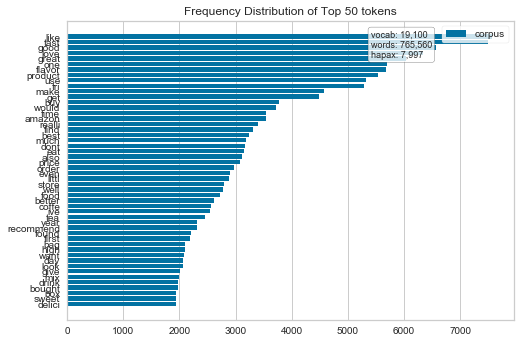

In [21]:
display_token(Count_vect,X_tr["CleanedText"])

<h3> Training the model over Cross_validation set by using the default parameters.</h3>

In [39]:
#Calling the train function and storing the prediction value and accuracy

Cpred,cacc=train(x_tr,y_tr,x_cv,y_cv)

The model score on train set is=  1.0

The accuracy of Logistic Regression over cross-validation set is =  84% 
The total number of non zero weights =  18987


<h3> Confusion matrix of the above trained model</h3>

[[1035  699]
 [ 884 7882]]


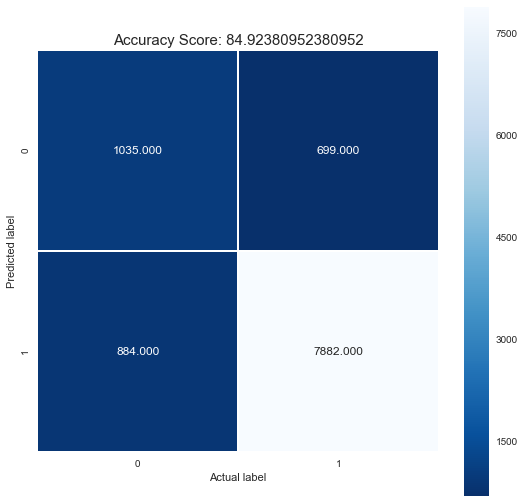


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     84.92380952380952     |
|       Classification_error      |     15.076190476190476    |
|          True positive          |            7882           |
|          False positive         |            699            |
|          True negative          |            1035           |
|          False negative         |            884            |
|        True positive rate       |     89.91558293406344     |
|       False negative rate       |     10.084417065936572    |
|        True negative rate       |     59.688581314878896    |
|       False positive rate       |     40.31141868512111     |
|         Precision value         |    

In [40]:
Confusion_metric(y_cv,Cpred,cacc)

<h3> Observation</h3>
<ul>
    <li>The above Logistic regression model was tested over the cross validation set and the train accuracy is about 85.03%.</li>
    <li>The Performance metrics of this model obtained after analyzing the confusion matrix is not that satisfactory due to the following reasons and they are as follows :</li>
    <ol>
        <li>The value of the diagonal elements of the matrix are not that much high infact the TP is 7837 and TN is 1092 which is far more less as compared to the TP value.</li>
        <li>The FNR value is 9.78% which is good because it is meant to be low but the TNR is 60.23% which is considerably not that high and the main reason of increase in the False positive rate (39.76).</li>
        <li>The Precision,Recall and the F1_Score values can't be trusted because of high TP value.</li>
        <li>So the model's performance can be improved by doing the hyperparameter tuning.</li>
        
        


<h3>Hyperparameter Tuning by using Gridsearch and Random-search for finding the optimal value of alpha.</h3> 

In [42]:
#Gridsearch implementation
best_param=gridsearch(x_tr,y_tr,x_cv,y_cv)

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.8810476190476191


In [43]:
#Random-search Implementation
Best_par=randomsearch(x_tr, y_tr,x_cv, y_cv)

LogisticRegression(C=0.0843364870614276, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.8582857142857143


<h3>Testing the model over Test set by taking the optimal value of alpha</h3>

In [44]:
New_clf=best_param

y_pre,acc=tuned_test(New_clf,x_tr,y_tr,x_test,y_test)

The model score on train set is=  0.9617142857142857

The accuracy of Logistic Regression over Test set is =  88% 
The total number of non zero weights =  18987


<h3>Confusion matrix of the above model</h3>

[[ 1956   631]
 [ 1076 11337]]


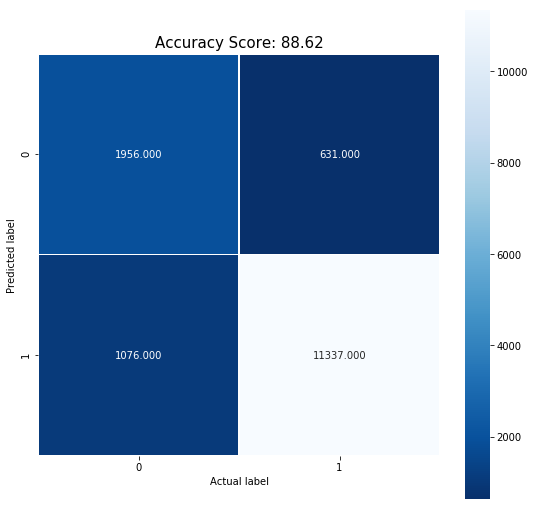


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |           88.62           |
|       Classification_error      |     11.379999999999999    |
|          True positive          |           11337           |
|          False positive         |            631            |
|          True negative          |            1956           |
|          False negative         |            1076           |
|        True positive rate       |     91.33166841214856     |
|       False negative rate       |     8.668331587851446     |
|        True negative rate       |     75.60881329725551     |
|       False positive rate       |     24.39118670274449     |
|         Precision value         |    

In [32]:
Confusion_metric(y_test,y_pre,acc)

<h2>Observations</h2>
<ul>
    <li>The test accuracy of the above model after taking the optimal alpha value is 88% which is quite good for a classification model.</li>
    <li>But still after doing hyperparameter tuning the model is still facing a little bias problem and the TP value still dominates.</li>
    <li>Since the above model has little bias problem but still it is a sensible and good model as the FNR & FPR have lower values as compared to other metrics which increases the TPR and TNR values.</li>
    <li>The model also has good Precision,Recall and F1_score values which is around (91% to 94%) which is very good for a classification model.</li>
    <li>Lets see by changing the regularization and alpha term how the model's performance changes and affects the logistic regression model</li>


<h2>Applying the L1 regularization over the Existing the model</h2>

In [35]:
#Calling the train function and storing the prediction value and accuracy

l1pred,l1acc=train(x_tr,y_tr,x_cv,y_cv,p="l1",C=0.1)

The model score on train set is=  0.9884081632653061

The accuracy of Logistic Regression over cross-validation set is =  88% 
The total number of non zero weights =  4830


[[1303  510]
 [ 701 7986]]


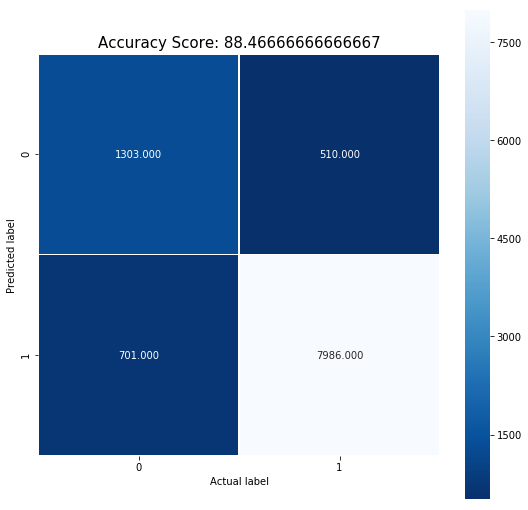


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     88.46666666666667     |
|       Classification_error      |     11.533333333333333    |
|          True positive          |            7986           |
|          False positive         |            510            |
|          True negative          |            1303           |
|          False negative         |            701            |
|        True positive rate       |     91.93047081846437     |
|       False negative rate       |     8.069529181535628     |
|        True negative rate       |     71.86982901268615     |
|       False positive rate       |     28.130170987313846    |
|         Precision value         |    

In [36]:
Confusion_metric(y_cv,l1pred,l1acc)

In [37]:
#Calling the train function and storing the prediction value and accuracy

l1_pred,l1_acc=train(x_tr,y_tr,x_cv,y_cv,p="l1",C=0.01)

The model score on train set is=  0.9161632653061225

The accuracy of Logistic Regression over cross-validation set is =  87% 
The total number of non zero weights =  1602


[[1446  367]
 [ 902 7785]]


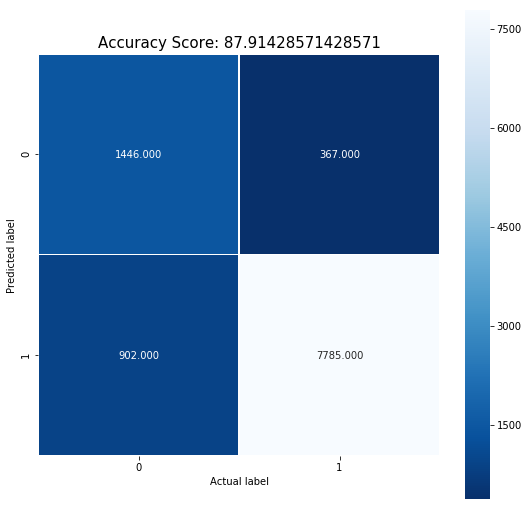


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     87.91428571428571     |
|       Classification_error      |     12.085714285714285    |
|          True positive          |            7785           |
|          False positive         |            367            |
|          True negative          |            1446           |
|          False negative         |            902            |
|        True positive rate       |     89.61666858524232     |
|       False negative rate       |     10.383331414757684    |
|        True negative rate       |      79.7573083287369     |
|       False positive rate       |      20.2426916712631     |
|         Precision value         |    

In [38]:
Confusion_metric(y_cv,l1_pred,l1_acc)

In [39]:
#Calling the train function and storing the prediction value and accuracy

l1_Pred,l1_Acc=train(x_tr,y_tr,x_cv,y_cv,p="l1",C=0.001)

The model score on train set is=  0.6560408163265307

The accuracy of Logistic Regression over cross-validation set is =  66% 
The total number of non zero weights =  42


[[1540  273]
 [3220 5467]]


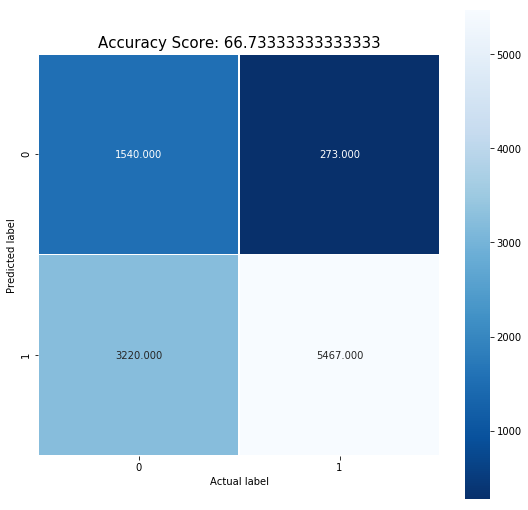


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     66.73333333333333     |
|       Classification_error      |     33.266666666666666    |
|          True positive          |            5467           |
|          False positive         |            273            |
|          True negative          |            1540           |
|          False negative         |            3220           |
|        True positive rate       |     62.93311845286059     |
|       False negative rate       |      37.0668815471394     |
|        True negative rate       |     84.94208494208493     |
|       False positive rate       |     15.057915057915059    |
|         Precision value         |    

In [40]:
Confusion_metric(y_cv,l1_Pred,l1_Acc)

<h3> Observations</h3>
<ul>
    <li>Since in the formulation of alpha in logistic regression it has a inverse relationship so here I had reduced the Lambda value by using the L1-regularisation and the results are as follows:
        <ol>
            <li>By increasing the values of lambda the total number of non zero weights decreases sharply as the regularization term which is L1 dominates and create sparsity.</li>
            <li>The accuracy and the other performance metrics of the also detoriated consistently from (88.64% to 66.73%)</li>
            <li>As the lamda value increases the False negative and the False positive rates vary which decreases the performance of the model.</li>
            <li> So clearly by increasing the value of lambda with L1-regularization creates sparsity and reduces accuracy of the model.</li>
            


<h3>Decreasing the "LAMBDA" value with L1- Regularization</h3> 

In [41]:
#Calling the train function and storing the prediction value and accuracy

L1pred,L1acc=train(x_tr,y_tr,x_cv,y_cv,p="l1",C=8)

The model score on train set is=  1.0

The accuracy of Logistic Regression over cross-validation set is =  86% 
The total number of non zero weights =  5446


[[1132  681]
 [ 781 7906]]


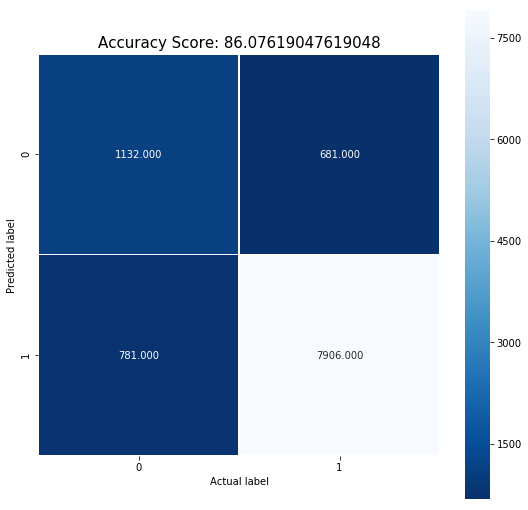


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     86.07619047619048     |
|       Classification_error      |     13.923809523809524    |
|          True positive          |            7906           |
|          False positive         |            681            |
|          True negative          |            1132           |
|          False negative         |            781            |
|        True positive rate       |      91.0095545067342     |
|       False negative rate       |     8.990445493265801     |
|        True negative rate       |     62.43794815223387     |
|       False positive rate       |     37.56205184776613     |
|         Precision value         |    

In [42]:
Confusion_metric(y_cv,L1pred,L1acc)

In [43]:
L1_pred,L1_acc=train(x_tr,y_tr,x_cv,y_cv,p="l1",C=58)

The model score on train set is=  1.0

The accuracy of Logistic Regression over cross-validation set is =  85% 
The total number of non zero weights =  6276


[[1092  721]
 [ 827 7860]]


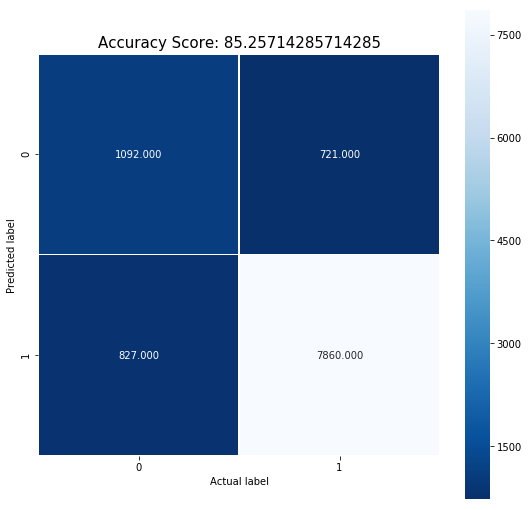


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     85.25714285714285     |
|       Classification_error      |     14.742857142857144    |
|          True positive          |            7860           |
|          False positive         |            721            |
|          True negative          |            1092           |
|          False negative         |            827            |
|        True positive rate       |     90.48002762748936     |
|       False negative rate       |     9.519972372510647     |
|        True negative rate       |     60.231660231660236    |
|       False positive rate       |     39.768339768339764    |
|         Precision value         |    

In [44]:
Confusion_metric(y_cv,L1_pred,L1_acc)

In [45]:
L1_Pred,L1_Acc=train(x_tr,y_tr,x_cv,y_cv,p="l1",C=100)

The model score on train set is=  1.0

The accuracy of Logistic Regression over cross-validation set is =  84% 
The total number of non zero weights =  6863


[[1073  740]
 [ 862 7825]]


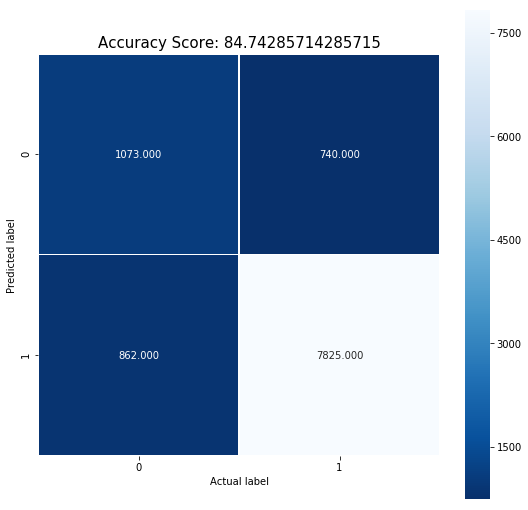


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     84.74285714285715     |
|       Classification_error      |     15.257142857142858    |
|          True positive          |            7825           |
|          False positive         |            740            |
|          True negative          |            1073           |
|          False negative         |            862            |
|        True positive rate       |      90.0771267411074     |
|       False negative rate       |     9.922873258892597     |
|        True negative rate       |     59.183673469387756    |
|       False positive rate       |     40.816326530612244    |
|         Precision value         |    

In [46]:
Confusion_metric(y_cv,L1_Pred,L1_Acc)

<h2>Observations</h2>
<ul>
    <li>Here there is a decrease in the total number of non zero weights but it becomes stable after a certain point and did not decreased further.</li>
    <li>The True negative rates are get affected most hence reducing the accuracy but it did not decrease beyond 84%.</li>
    <li>Since here sparsity is not seen very severe, that's why the accuracy did not drop sharply.</li>
       


<h3>Plotting the cv error plot using 10K cross validation technique</h3>

--------------------------------------------------------------------------------------------------------
for alpha = 1e-06

the misclassification error for each alpha value is :  [0.248]
--------------------------------------------------------------------------------------------------------
for alpha = 1e-05

the misclassification error for each alpha value is :  [0.248 0.118]
--------------------------------------------------------------------------------------------------------
for alpha = 0.0001

the misclassification error for each alpha value is :  [0.248 0.118 0.098]
--------------------------------------------------------------------------------------------------------
for alpha = 0.001

the misclassification error for each alpha value is :  [0.248 0.118 0.098 0.104]
--------------------------------------------------------------------------------------------------------
for alpha = 0.01

the misclassification error for each alpha value is :  [0.248 0.118 0.098 0.104 0.116]
-----

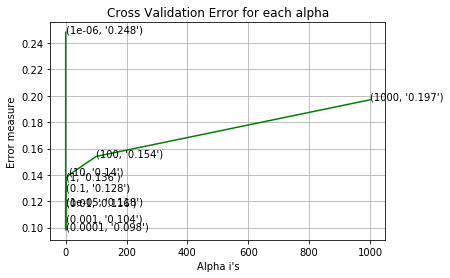


The optimal number of alpha value is 0.000100%.


In [47]:
cv_results(x_tr,y_tr)

<h3>Testing the model over th test set using the optimal lamda value</h3>

In [45]:
New_clf=best_param

y_pre,acc=tuned_test(New_clf,x_tr,y_tr,x_test,y_test)

The model score on train set is=  0.9617142857142857

The accuracy of Logistic Regression over Test set is =  88% 
The total number of non zero weights =  18987


<h3>Confusion matrix of the above model</h3>

[[ 1972   673]
 [ 1047 11308]]


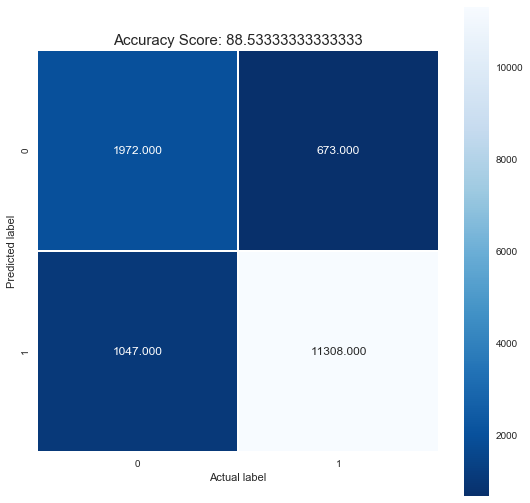


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     88.53333333333333     |
|       Classification_error      |     11.466666666666667    |
|          True positive          |           11308           |
|          False positive         |            673            |
|          True negative          |            1972           |
|          False negative         |            1047           |
|        True positive rate       |     91.52569809793606     |
|       False negative rate       |     8.474301902063942     |
|        True negative rate       |     74.55576559546314     |
|       False positive rate       |     25.444234404536864    |
|         Precision value         |    

In [46]:
Confusion_metric(y_test,y_pre,acc)

<h3>Observations</h3>
<ul>
    <li>The optimal number of lamda found after gridsearch and 10k crossvalidation is 0.0001 with a missclassification error of 11.46% and gave a test accuracy of 88.53% which is good for a classification model.</li>
    <li>The performance metrics of the logistic regression model over test set is good as compared with the earlier model.</li>
    <li>The model is sensible but still it is facing a slight bias problem as the True negative rate is low as compared to the True positive rates.</li>
    <li>Let's check the multicollinearity of features by using the pertubation test.</li>

<h2> Implementing and checking the multicollinearity test.</h2>

<h3>Function for genarating and adding noise to the above model</h3> 

In [19]:
import numpy as np
def Noise(x_tr,x_test):
    mu, sigma = 0, 0.01 
# creating a noise with the same dimension as the dataset (2,2) 
    Train_noise = np.random.normal(mu, sigma, x_tr.shape) 
    print(Train_noise)

    Train_data=x_tr + Train_noise
    print("\nThe shape of the train data after adding noise is :",Train_data.shape)
    
    print("*"*100)


# creating a noise with the same dimension as the dataset (2,2) 
    Test_noise = np.random.normal(mu, sigma, x_test.shape) 
    print(Test_noise)

    Test_data= x_test + Test_noise
    print("\nThe shape of the test data after adding noise is :",Test_data.shape)

    return Train_data,Test_data


<h3> The shape of the noise added Train and Test set is as follows:</h3> 

In [47]:
Train_nd,Test_nd=Noise(x_tr,x_test)

[[-0.00049436  0.00749982 -0.00832213 ... -0.0046638  -0.01298233
  -0.01178142]
 [-0.01473462 -0.01046555  0.00221836 ...  0.00110465  0.0056567
   0.00933101]
 [ 0.00018067 -0.01348652  0.00996227 ... -0.00863126 -0.00019525
   0.00274925]
 ...
 [ 0.00674569 -0.00579183 -0.01269166 ...  0.00068726  0.00528758
   0.00518848]
 [-0.00796659  0.01397421  0.00390764 ...  0.00125421 -0.00349247
   0.01187116]
 [-0.02003545  0.01269014 -0.00035191 ... -0.00517335  0.00957207
  -0.02423328]]

The shape of the train data after adding noise is : (24500, 18987)
****************************************************************************************************
[[-0.00706879 -0.00857271  0.00487714 ...  0.01416849  0.01692085
  -0.01188144]
 [-0.00354436 -0.0090666  -0.00869587 ...  0.00395706  0.00070504
   0.00319864]
 [ 0.00285856  0.01710856 -0.00473573 ... -0.00939172 -0.010282
   0.00178905]
 ...
 [-0.01442047  0.00400136  0.00775977 ...  0.00610265  0.0060188
   0.00499617]
 [-0.01823305 

<h3> Testing the above model over the noise added Test set</h3>

In [48]:
New_clf=best_param

Noise_pre,Noise_acc=tuned_test(New_clf,Train_nd,y_tr,Test_nd,y_test)

The model score on train set is=  0.9616326530612245

The accuracy of Logistic Regression over Test set is =  88% 
The total number of non zero weights =  18987


<h3> Confusion matrix of the above model is as follows:</h3>

[[ 1970   675]
 [ 1047 11308]]


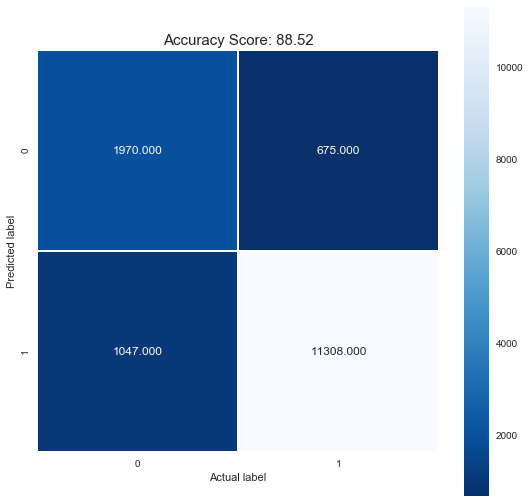


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+----------------------------------+--------------------------+
|             Metrics              |          Scores          |
+----------------------------------+--------------------------+
|     Classification_accuracy      |          88.52           |
|       Classification_error       |          11.48           |
|          True positive           |          11308           |
|          False positive          |           675            |
|          True negative           |           1970           |
|          False negative          |           1047           |
|        True positive rate        |    91.52569809793606     |
|       False negative rate        |    8.474301902063942     |
|        True negative rate        |    74.48015122873346     |
|       False positive rate        |    25.51984877126654     |
|         Precision value          |   

In [49]:
Confusion_metric(y_test,Noise_pre,Noise_acc)

<h2>Observations</h2>
<ul>
    <li>Since the total number of non zero weights are same before and after adding the noise to the data so the features are not collinear with each other.</li>
    <li>The accuracy of the noise added model is slightly increased which is about 0.35% which is due to the small random noise introduced to the data.</li>
    <li>Since the features are not collinear we can find the feature importance by using the Recursive Feature Elimination technique.</li>


<h3>Function for implementing the Recursive Feature Elimination Technique for finding the most important features present in the data</h3>

In [23]:
def feature_selection(best,tr_Noise, Train_y):
    from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
    rfecv = RFECV(estimator=best, step=1, cv=3,scoring ='accuracy')
    rfecv.fit(tr_Noise, Train_y)

    print("Optimal number of features: %d" % rfecv.n_features_)
    print('Selected features: %s' % list(tr_Noise.columns[rfecv.support_]))

    NAMES=tr_Noise.columns
    print ("Features sorted by their rank:")
    print (sorted(zip(map(lambda x: round(x, 4), viz.ranking_), NAMES)))



# Plot number of features VS. cross-validation scores
    plt.figure(figsize=(10,6))
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()


In [ ]:
start = datetime.now()
best=best_param
feature_selection(best,Train_nd,y_tr) 

print('Time taken :', datetime.now() - start)


<h2>Note</h2>
<ul>
    <li>The Recursive Feature elimination technique is used to find out the important features present in the dataset it is basically an Iterative feature selection approach.</li>
    <li>The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.</li>
    <li>First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.</li>
    <li>The least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.</li>
        <li>So the time complexity of this approach is very high. so I had implemented this technique in Avg W2V and Tf-idf weighted W2V where the dimensions of the data is reasonable and can be easily implemented.</li>

<h3>Implementing the TF-IDF Vectorization technique over the given data.</h3> 

In [20]:
#Initializing the count vectorizer 
TFIDF_vect=TfidfVectorizer(ngram_range=(1,2),binary=True)

#vectorizing the X_train set
TF,tfx_tr=vec_train(TFIDF_vect,TFX_tr["CleanedText"])

print("The shape of the X_train is: ",tfx_tr.shape)

#Vectgorizing the X_crossvalidation set
tfx_cv=vec_cv(TF,TFX_cv["CleanedText"])
print("The shape of the X_cv is: ",tfx_cv.shape)

#Vectorizing the X_test set
tfx_test=vec_test(TF,TFX_test["CleanedText"])
print("The shape of the X_test is: ",tfx_test.shape)


#Printing the total length of the features
print("\nTop 25 feaures acording to the TF-IDF score are as follows")
TF_features = TFIDF_vect.get_feature_names()
len(TF_features)


top_TFIDF = top_tfidf_feats("TFIDF",tfx_tr[1,:].toarray()[0],TF_features,25)
top_TFIDF



The shape of the X_train is:  (3920, 111810)
The shape of the X_cv is:  (1680, 111810)
The shape of the X_test is:  (2400, 111810)

Top 25 feaures acording to the TF-IDF score are as follows


,feature,TFIDF
0,romanc,62.617891
1,world live,62.617891
2,break cover,62.617891
3,stori strang,62.617891
4,one funiest,62.617891
5,job see,62.617891
6,see movi,62.617891
7,deceas handbook,62.617891
8,haunt take,62.617891
9,romanc alec,62.617891


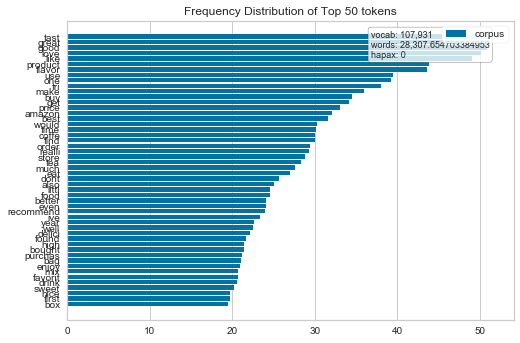

In [23]:
display_token(TFIDF_vect,TFX_tr["CleanedText"])

<h2>Training the Tfidf Vectorized model over the cross-Validation set</h2>

In [51]:
#Training the logistic regression model
tfy_pre,tfacc=train(tfx_tr,TFy_tr,tfx_cv,TFy_cv)

The model score on train set is=  1.0

The accuracy of Logistic Regression over cross-validation set is =  85% 
The total number of non zero weights =  108306


<h3>Plotting the Confusion matrix of the above model</h3>

[[  12  242]
 [   0 1426]]


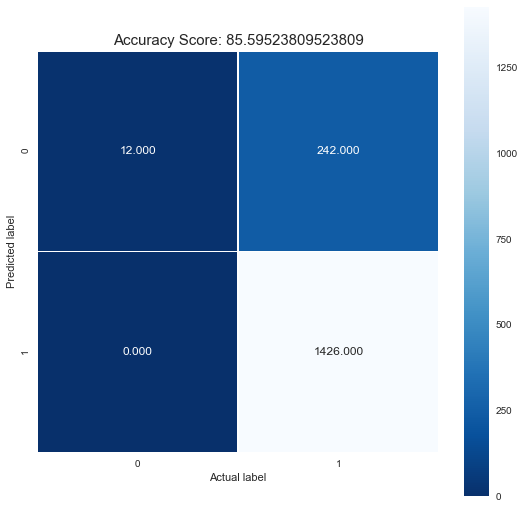


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     85.59523809523809     |
|       Classification_error      |     14.404761904761903    |
|          True positive          |            1426           |
|          False positive         |            242            |
|          True negative          |             12            |
|          False negative         |             0             |
|        True positive rate       |           100.0           |
|       False negative rate       |            0.0            |
|        True negative rate       |     4.724409448818897     |
|       False positive rate       |      95.2755905511811     |
|         Precision value         |    

In [52]:
Confusion_metric(TFy_cv,tfy_pre,tfacc)

<h3>Hyperparameter tuning the lamda value using the Gridsearch & randomsearch cross-validation technique.</h3>

In [21]:
#Gridsearch implementation
best_tfparam=gridsearch(tfx_tr,TFy_tr,tfx_cv,TFy_cv)

LogisticRegression(C=1e-05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.8910714285714286


In [54]:
#Random-search Implementation
Best_randpar=randomsearch(tfx_tr, TFy_tr,tfx_cv, TFy_cv)

LogisticRegression(C=0.5131306580538797, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.856547619047619


<h3>Plotting the optimal lamda results using 10k crossvalidation technique.</h3>

--------------------------------------------------------------------------------------------------------
for alpha = 1e-06

the misclassification error for each alpha value is :  [0.193]
--------------------------------------------------------------------------------------------------------
for alpha = 1e-05

the misclassification error for each alpha value is :  [0.193 0.101]
--------------------------------------------------------------------------------------------------------
for alpha = 0.0001

the misclassification error for each alpha value is :  [0.193 0.101 0.129]
--------------------------------------------------------------------------------------------------------
for alpha = 0.001

the misclassification error for each alpha value is :  [0.193 0.101 0.129 0.134]
--------------------------------------------------------------------------------------------------------
for alpha = 0.01

the misclassification error for each alpha value is :  [0.193 0.101 0.129 0.134 0.134]
-----

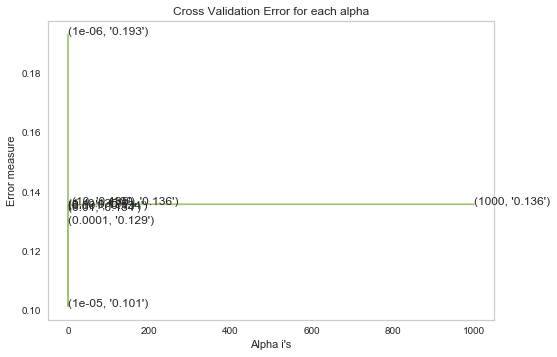


The optimal number of alpha value is 0.000010%.


In [55]:
cv_results(tfx_tr, TFy_tr)

<h3> Testing the model over test set using optimal value of lamda</h3>

In [56]:
TF_clf=best_tfparam

TFy_pre,TF_acc=tuned_test(TF_clf,tfx_tr,TFy_tr,tfx_test,TFy_test)

The model score on train set is=  1.0

The accuracy of Logistic Regression over Test set is =  86% 
The total number of non zero weights =  108306


<h3>Confusion matrix of the above model.</h3>

[[ 193  248]
 [  76 1883]]


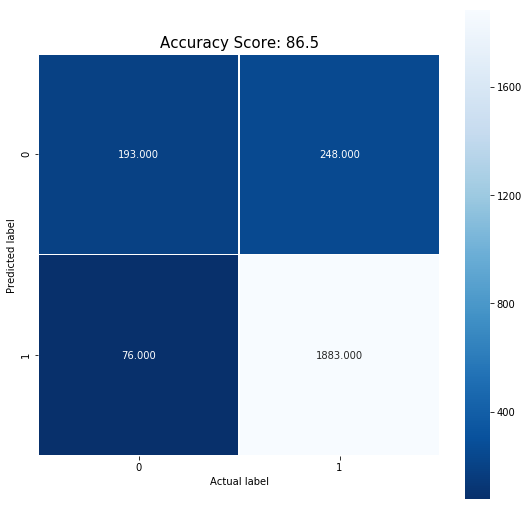


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |            86.5           |
|       Classification_error      |            13.5           |
|          True positive          |            1883           |
|          False positive         |            248            |
|          True negative          |            193            |
|          False negative         |             76            |
|        True positive rate       |     96.12046962736089     |
|       False negative rate       |     3.8795303726391013    |
|        True negative rate       |     43.76417233560091     |
|       False positive rate       |     56.235827664399096    |
|         Precision value         |    

In [42]:
Confusion_metric(TFy_test,TFy_pre,TF_acc)

<h3> Checking the Collinearity of features using the Pertubation test.</h3>

In [22]:
TrainTf_Noise,TestTF_Noise=Noise(tfx_tr,tfx_test)

[[-0.0293998   0.00574307 -0.01102008 ... -0.00566326 -0.00394131
   0.00733515]
 [ 0.0134632   0.00575275 -0.00194554 ... -0.01083167 -0.00697928
   0.01552455]
 [-0.01683894 -0.00300703  0.00960419 ...  0.00361058  0.01164493
  -0.00696104]
 ...
 [-0.0037834   0.0020388  -0.01235432 ... -0.00450846  0.01589632
   0.01166761]
 [-0.00076997  0.00264301 -0.0117148  ... -0.01369906 -0.00485977
  -0.00973072]
 [ 0.00940964  0.01028941 -0.00129644 ... -0.01832069 -0.00319472
   0.00191571]]

The shape of the train data after adding noise is : (3920, 111810)
****************************************************************************************************
[[-0.00417559 -0.00704755 -0.00141303 ...  0.01626558  0.00226082
  -0.01262548]
 [-0.0141736   0.00596285 -0.00596431 ...  0.00877768  0.00377179
  -0.01257661]
 [-0.0091882   0.00284102  0.00032274 ... -0.01078585  0.00518952
  -0.00123502]
 ...
 [ 0.00426562 -0.00367072  0.00452932 ...  0.00798885  0.01859829
   0.00881884]
 [-0.00904

<h3> Testing the above model over the noise added Test set</h3>

In [23]:
TF_clf=best_tfparam
Noise_tfpre,Noise_tfacc=tuned_test(TF_clf,TrainTf_Noise,TFy_tr,TestTF_Noise,TFy_test)

The model score on train set is=  1.0

The accuracy of Logistic Regression over Test set is =  87% 
The total number of non zero weights =  111810


<h2>Observations</h2>
<ul>
    <li>Since the total number of non zero weights are same before and after adding the noise to the data so the features are not collinear with each other.</li>
    <li>The accuracy of the noise added model is slightly increased which is about 0.35% which is due to the small random noise introduced to the data.</li>
    <li>Since the features are not collinear we can find the feature importance by using the Recursive Feature Elimination technique.</li>


<h2>Implementing the Avg Word to vectorization technique</h2>

In [20]:
start = datetime.now()
import gensim

# Train our own Word2Vec model using text corpus
list_of_sentence_vec=[]
for sentence in Sample_sort['CleanedText'].values:
    list_of_sentence_vec.append(sentence.split())
# Generate model.
w2v_Model = gensim.models.Word2Vec(list_of_sentence_vec,min_count=5,size=50, workers=6)

w2v_Words = list(w2v_Model.wv.vocab)
print("number of words that occured minimum 5 times is ",len(w2v_Words))


#code for finding the avg w2v
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sentence_vec: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_Model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    #print(np.isnan(np.sum(sent_vec)))
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

print('Time taken :', datetime.now() - start)

number of words that occured minimum 5 times is  9352
50000
50
Time taken : 0:00:08.840139


<h3>Checking for the NAN Values in the dataset</h3>

In [21]:
np.argwhere(np.isnan(sent_vectors))#checking for nan values

array([], shape=(0, 2), dtype=int64)

<h3>Preparing the data for the further implementations</h3>

In [22]:
X_w2v=sent_vectors
y_w2v=label

TrainX_w2v,Trainy_w2v,TrainX_w2vCV,Testy_w2vCV,TestX_w2v,Testy_data=data_split(X_w2v,y_w2v)

In [23]:
Train_df=pd.DataFrame(TrainX_w2v)
print(Train_df.shape)

Test_df=pd.DataFrame(TestX_w2v)
print(Test_df.shape)

(24500, 50)
(15000, 50)


<h3>Training the model over the Avg word to vectorized data.</li>

In [24]:
#Calling the train function and storing the prediction value and accuracy

W2V_pred,W2V_acc=train(TrainX_w2v,Trainy_w2v,TrainX_w2vCV,Testy_w2vCV)

The model score on train set is=  0.8046530612244898

The accuracy of Logistic Regression over cross-validation set is =  77% 
The total number of non zero weights =  50


[[1446  288]
 [2047 6719]]


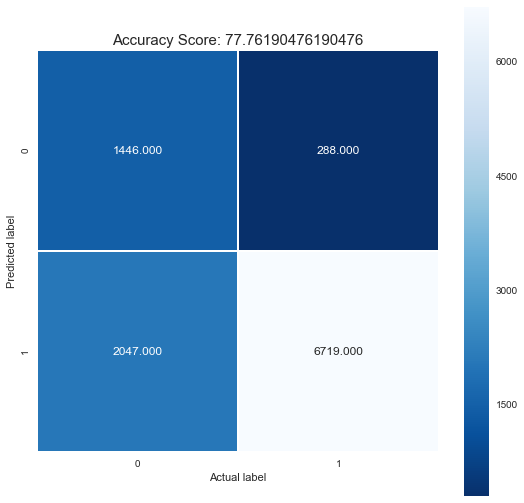


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     77.76190476190476     |
|       Classification_error      |     22.238095238095237    |
|          True positive          |            6719           |
|          False positive         |            288            |
|          True negative          |            1446           |
|          False negative         |            2047           |
|        True positive rate       |     76.64841432808579     |
|       False negative rate       |     23.35158567191421     |
|        True negative rate       |     83.39100346020761     |
|       False positive rate       |     16.608996539792386    |
|         Precision value         |    

In [25]:
Confusion_metric(Testy_w2vCV,W2V_pred,W2V_acc)

<h3>Hyperparameter tuning for finding the optimal lambda using Gridsearch and Randomsearch technique</h3>

In [26]:
#Gridsearch implementation
best_W2Vparam=gridsearch(TrainX_w2v,Trainy_w2v,TrainX_w2vCV,Testy_w2vCV)

LogisticRegression(C=1e-06, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.784


In [27]:
#Random-search Implementation
Best_W2Vpar=randomsearch(TrainX_w2v,Trainy_w2v,TrainX_w2vCV,Testy_w2vCV)

LogisticRegression(C=0.05288171502573946, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.7780952380952381


<h3>Implementing the 10K Cross-validation techniques for plotting the optimal K value</h3>

--------------------------------------------------------------------------------------------------------
for alpha = 1e-06

the misclassification error for each alpha value is :  [0.19]
--------------------------------------------------------------------------------------------------------
for alpha = 1e-05

the misclassification error for each alpha value is :  [0.19  0.197]
--------------------------------------------------------------------------------------------------------
for alpha = 0.0001

the misclassification error for each alpha value is :  [0.19  0.197 0.217]
--------------------------------------------------------------------------------------------------------
for alpha = 0.001

the misclassification error for each alpha value is :  [0.19  0.197 0.217 0.21 ]
--------------------------------------------------------------------------------------------------------
for alpha = 0.01

the misclassification error for each alpha value is :  [0.19  0.197 0.217 0.21  0.2  ]
------

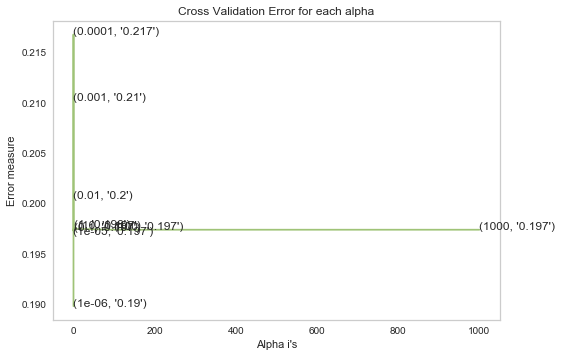


The optimal number of alpha value is 0.000001%.


In [28]:
cv_results(TrainX_w2v,Trainy_w2v)

<h2>Training the model over the cross-validation set.</h2>

In [30]:
W2V_clf=Best_W2Vpar

TFy_pre,TF_acc=tuned_test(W2V_clf,TrainX_w2v,Trainy_w2v,TestX_w2v,Testy_data)

The model score on train set is=  0.8042448979591836

The accuracy of Logistic Regression over Test set is =  78% 
The total number of non zero weights =  50


<h2>Confusion matrix of the above model</h2>

[[2273  372]
 [2849 9506]]


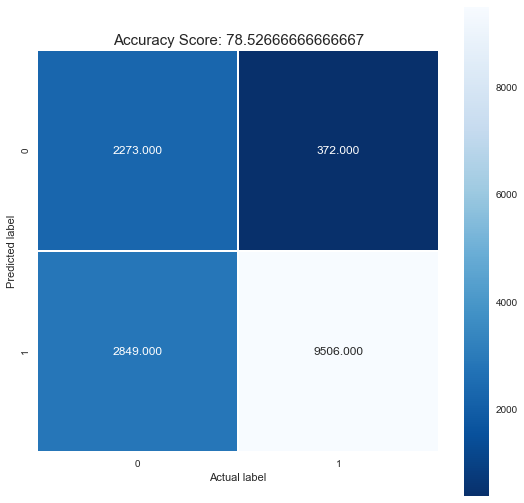


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     78.52666666666667     |
|       Classification_error      |     21.473333333333333    |
|          True positive          |            9506           |
|          False positive         |            372            |
|          True negative          |            2273           |
|          False negative         |            2849           |
|        True positive rate       |     76.94050991501416     |
|       False negative rate       |     23.059490084985836    |
|        True negative rate       |     85.93572778827976     |
|       False positive rate       |     14.064272211720228    |
|         Precision value         |    

In [31]:
Confusion_metric(Testy_data,TFy_pre,TF_acc)

<h2>Implementing the pertubation test for checking the multicollinearity of features.</h2>

In [34]:
Trw2v_Noise,Tesw2v_Noise=Noise(Train_df,Test_df)

[[-3.02199141e-03 -6.40994457e-03  1.40113940e-02 ... -1.83079661e-02
   1.36145430e-02 -8.03450608e-03]
 [-6.80652054e-03  1.03672029e-02  9.71838403e-03 ... -1.35212441e-03
   2.17315200e-03  2.34714024e-05]
 [ 4.34024763e-03  6.21594492e-03 -1.43264778e-02 ...  2.98205029e-03
   3.14499459e-03  2.87263470e-03]
 ...
 [-1.75968199e-02  1.55204670e-02  3.35575260e-03 ... -4.42612518e-03
   1.93777972e-04  4.97164143e-03]
 [ 1.30101268e-02 -1.42451312e-02 -6.56538958e-03 ...  1.21692669e-03
  -3.02072584e-03  1.04822745e-02]
 [ 4.53560945e-04  1.59315463e-02 -7.14761609e-03 ... -8.17045105e-03
  -3.13140673e-03  1.22633742e-02]]

The shape of the train data after adding noise is : (24500, 50)
****************************************************************************************************
[[-1.68171043e-02  5.17149174e-03  1.70818856e-02 ... -1.47462812e-04
   1.88291463e-02 -1.23780137e-03]
 [-5.06956228e-03 -4.79932671e-03  2.07591027e-02 ...  2.62780661e-02
  -4.95871116e-03 -3.47

<h2>Testing the model over the noise added inputs</h2>

In [35]:
W2V_clf=Best_W2Vpar

w2v_Noise_pre,w2v_noise_acc=tuned_test(W2V_clf,Trw2v_Noise,Trainy_w2v,Tesw2v_Noise,Testy_data)

The model score on train set is=  0.804

The accuracy of Logistic Regression over Test set is =  78% 
The total number of non zero weights =  50


<h2>Confusion matrix of the above model.</h2>

[[2271  374]
 [2838 9517]]


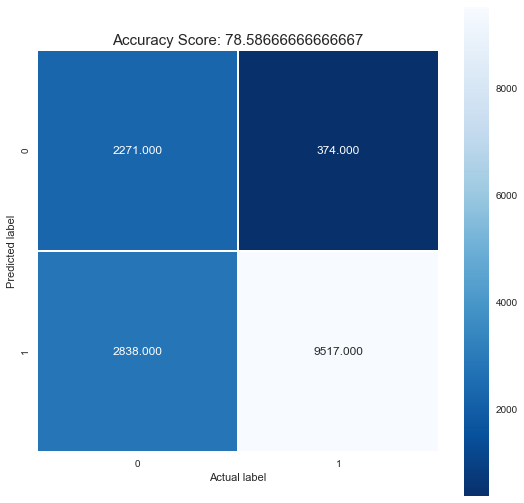


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     78.58666666666667     |
|       Classification_error      |     21.413333333333334    |
|          True positive          |            9517           |
|          False positive         |            374            |
|          True negative          |            2271           |
|          False negative         |            2838           |
|        True positive rate       |     77.02954269526508     |
|       False negative rate       |     22.970457304734925    |
|        True negative rate       |      85.8601134215501     |
|       False positive rate       |     14.139886578449905    |
|         Precision value         |    

In [36]:
Confusion_metric(Testy_data,w2v_Noise_pre,w2v_noise_acc)

<h2>Observations</h2>
<ul>
    <li>After performing the pertubation test and testing the features over the test set the performance of the model did not changed that much.</li>
    <li>The total number of the non negative weights are same as compared to the previous model,So the features are not collinear which is good for the model.</li>
    <li>So I had implemented the feature importance by using the Recursive Feature elimination technique to find the most useful features which explain good amount of variance.</li>
    


<h2> Function for performing Feature Importance using Recursive Feature elimination Cross-validation technique.</h2>

In [37]:
#Function for finding the Important features

from yellowbrick.features import RFECV
def Feature_imp(best,tr_Noise, Train_y):
    LOG= best
    viz = RFECV(LOG, cv=3, scoring='accuracy')
    viz.fit(tr_Noise, Train_y)

    print("Optimal number of features: %d" % viz.n_features_)
    print('Selected features: %s' % list(tr_Noise.columns[viz.support_]))

    NAMES=tr_Noise.columns
    print ("Features sorted by their rank:")
    print (sorted(zip(map(lambda x: round(x, 4), viz.ranking_), NAMES)))

    viz.poof()



<h3> Code for finding the calling the RFECV function and listing the important features by rank.</h3>

Optimal number of features: 34
Selected features: [0, 2, 3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 17, 18, 21, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 47, 48, 49]
Features sorted by their rank:
[(1, 0), (1, 2), (1, 3), (1, 4), (1, 6), (1, 7), (1, 8), (1, 9), (1, 12), (1, 13), (1, 15), (1, 16), (1, 17), (1, 18), (1, 21), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 30), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 40), (1, 41), (1, 47), (1, 48), (1, 49), (2, 44), (3, 39), (4, 10), (5, 31), (6, 20), (7, 42), (8, 45), (9, 1), (10, 11), (11, 19), (12, 43), (13, 46), (14, 29), (15, 22), (16, 5), (17, 14)]


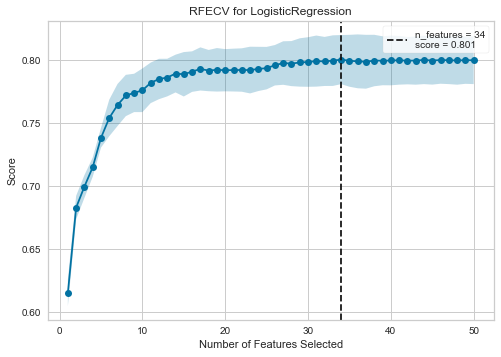

Time taken : 0:09:26.362678


In [38]:
start = datetime.now()
best=Best_W2Vpar
Feature_imp(best,Trw2v_Noise,Trainy_w2v)

print('Time taken :', datetime.now() - start)

<h2>Observation</h2>
<ol>
    <li>Here after implementing the RFE technique the most important features present in the model is 34 which are displayed in the form of a list.</li>
    <li>The Recursive feature elimination Cross validation (RFECV) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.</li>
    <li>Features are ranked by the model's coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.
    <li>Mostly the features which are having higher ranks are got selected and displayed above.</li>
    <li>To find the optimal number of features cross-validation is used with RFE to score different feature subsets and select the best scoring collection of features.</li>
    <li>The RFECV visualizer plots the number of features in the model along with their cross-validated test score and variability and visualizes the selected number of features quite properly.</li>
    <li>This figure shows an ideal RFECV curve, the curve jumps to an excellent accuracy when the six informative features are captured, then gradually decreases in accuracy as the non informative features are added into the model.</li>
    <li>The shaded area represents the variability of cross-validation, one standard deviation above and below the mean accuracy score drawn by the curve.</li>
    <li>After selecting the optimum features the accuracy of the model increased by 2% which is very good.</li>
        






<h2>Implementing TF-IDF Weighted Word to vectorization technique</h2>

In [52]:
start = datetime.now()

Tfidf_vector=TfidfVectorizer()
Tf_model=Tfidf_vector.fit_transform(Sample_sort["CleanedText"].values)

Dimension=Tfidf_vector.get_feature_names() 

LIST_VECTOR=[]
row=0
for sentence in list_of_sentence_vec:
    word_2_vec=np.zeros(50)
    weight_tf_sum=0
    for word in sentence:
        try:
            vec=w2v_Model.wv[word]
            tfidf_value=Tf_model[row,Dimension.index(word)]
            word_2_vec += (vec* tfidf_value)
            weight_tf_sum += tfidf_value
        except:
            pass
    if weight_tf_sum !=0:
        word_2_vec /=weight_tf_sum
    LIST_VECTOR.append(word_2_vec)
    row += 1
    
print('Time taken :', datetime.now() - start)

Time taken : 0:07:25.215544


<h3>Preparing the data into train and test sets </h3>

In [53]:
X_tfw=LIST_VECTOR
y_tfw=label

TrainX_tfw,Trainy_tfw,TrainX_tfwCV,Testy_tfwCV,TestX_tfw,Testy_tfw=data_split(X_tfw,y_tfw)

<h3>Training the logistic regression model over the Cross-validation set.</h3>

In [54]:
#Calling the train function and storing the prediction value and accuracy

TFW_pred,TFW_acc=train(TrainX_tfw,Trainy_tfw,TrainX_tfwCV,Testy_tfwCV)

The model score on train set is=  0.7897142857142857

The accuracy of Logistic Regression over cross-validation set is =  77% 
The total number of non zero weights =  50


<h3>Plotting the confusion matrix of the above table</h3>

[[1485  302]
 [2029 6684]]


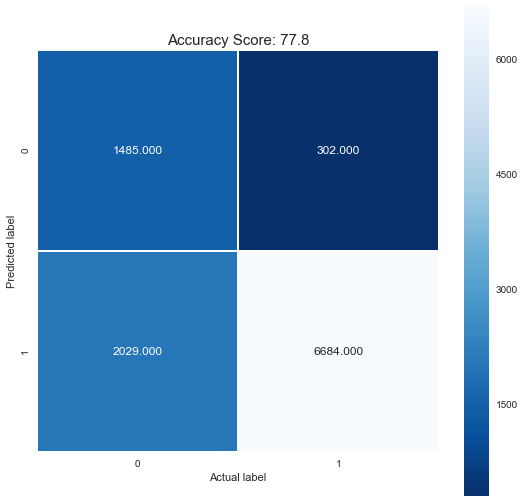


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |            77.8           |
|       Classification_error      |            22.2           |
|          True positive          |            6684           |
|          False positive         |            302            |
|          True negative          |            1485           |
|          False negative         |            2029           |
|        True positive rate       |     76.71295764948927     |
|       False negative rate       |     23.28704235051073     |
|        True negative rate       |     83.10016787912703     |
|       False positive rate       |     16.899832120872972    |
|         Precision value         |    

In [55]:
Confusion_metric(Testy_tfwCV,TFW_pred,TFW_acc)

<h2>Observations</h2>
<ul>
    <li>The train accuracy of the model is 77.8% which is quite low for a classification model.</li>
    <li>The true positive and true negative rates are good as compared to the other parameters of the model.</li>
    <li>Let's Hyperparameter tune the above model to find the optimum lamda and improve the model's performance further.</li>
    

<h3>Hyperparameter tuning the lambda for optimal performance of the model</h3>

In [56]:
#Gridsearch implementation
best_TFWparam=gridsearch(TrainX_tfw,Trainy_tfw,TrainX_tfwCV,Testy_tfwCV)

LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.7782857142857142


In [57]:
#Random-search Implementation
Best_TFWpar=randomsearch(TrainX_tfw,Trainy_tfw,TrainX_tfwCV,Testy_tfwCV)

LogisticRegression(C=0.17871030173670766, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.7780952380952381


<h3>Plotting the cross-validation error plots by using the 10k-fold Cross validation technique</h3>

--------------------------------------------------------------------------------------------------------
for alpha = 1e-06

the misclassification error for each alpha value is :  [0.239]
--------------------------------------------------------------------------------------------------------
for alpha = 1e-05

the misclassification error for each alpha value is :  [0.239 0.241]
--------------------------------------------------------------------------------------------------------
for alpha = 0.0001

the misclassification error for each alpha value is :  [0.239 0.241 0.241]
--------------------------------------------------------------------------------------------------------
for alpha = 0.001

the misclassification error for each alpha value is :  [0.239 0.241 0.241 0.229]
--------------------------------------------------------------------------------------------------------
for alpha = 0.01

the misclassification error for each alpha value is :  [0.239 0.241 0.241 0.229 0.218]
-----

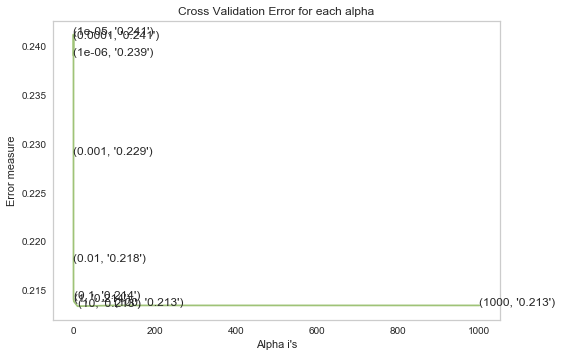


The optimal number of alpha value is 10.000000%.


In [58]:
cv_results(TrainX_tfw,Trainy_tfw)

<h3>Testing the model over the test set</li>

In [59]:
Tfw_clf=best_TFWparam


TFWordy_pre,TFWord_acc=tuned_test(Tfw_clf,TrainX_tfw,Trainy_tfw,TestX_tfw,Testy_tfw)

The model score on train set is=  0.7892653061224489

The accuracy of Logistic Regression over Test set is =  77% 
The total number of non zero weights =  50


<h3>Confusion matrix of the above model</h3>

[[2073  467]
 [2888 9572]]


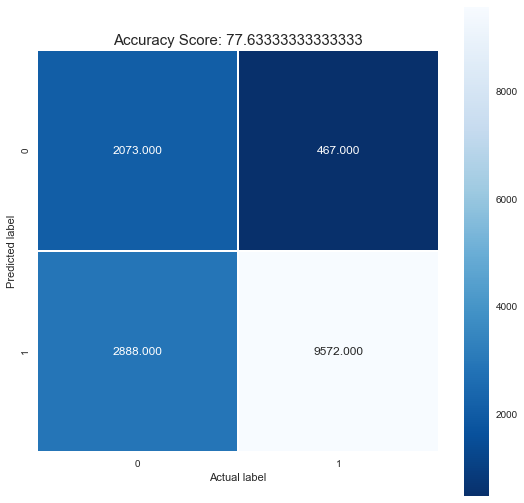


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     77.63333333333333     |
|       Classification_error      |     22.366666666666667    |
|          True positive          |            9572           |
|          False positive         |            467            |
|          True negative          |            2073           |
|          False negative         |            2888           |
|        True positive rate       |     76.82182985553771     |
|       False negative rate       |     23.17817014446228     |
|        True negative rate       |     81.61417322834646     |
|       False positive rate       |     18.385826771653544    |
|         Precision value         |    

In [60]:
Confusion_metric(Testy_tfw,TFWordy_pre,TFWord_acc)

<h2>Observations</h2>
<ul>
    <li>The test accuracy of the model after using the optimal lamda value is around 77.63% which is somewhat not good for a model.</li>
    <li>Here the False negative value is high which is indeed decreasing the accuracy and alarming for a model but still it is manageable.</li>
    <li>The precision and the f1_score of the model is good but the recall score is low as compared to them.</li>
    <li>Let's check the multicollinearity of features by using the pertubation test.</li>

<h3>Implementing the pertubation test for checking the multicollinearity of the features</h3>

In [61]:
Train_Df=pd.DataFrame(TrainX_tfw)
print(Train_Df.shape)

Test_Df=pd.DataFrame(TestX_tfw)
print(Test_Df.shape)

(24500, 50)
(15000, 50)


In [62]:
TF_tr_Noise,TF_test_Noise=Noise(Train_Df,Test_Df)

[[-0.0110854   0.01238318 -0.00895173 ... -0.00316227 -0.00861479
   0.0139621 ]
 [-0.00566234 -0.00611305 -0.0085816  ... -0.00280026  0.00415353
  -0.00246439]
 [-0.01033268  0.00701506 -0.00575518 ... -0.01006112 -0.00094393
  -0.0074085 ]
 ...
 [-0.00866337  0.0021541  -0.00639876 ... -0.00468766 -0.00124288
   0.00459445]
 [ 0.01035186  0.005232    0.00468396 ...  0.02468319 -0.00724922
   0.0073261 ]
 [-0.01189647  0.0116616  -0.00373697 ... -0.0099061   0.00913371
  -0.00532188]]

The shape of the train data after adding noise is : (24500, 50)
****************************************************************************************************
[[-0.00144414  0.01157601 -0.02103094 ... -0.00353485  0.014855
   0.00313991]
 [-0.0073264  -0.0089024  -0.00346809 ...  0.00692251  0.00852939
   0.01221543]
 [ 0.00329418 -0.0130511   0.0090682  ... -0.01372008  0.01148326
  -0.00046779]
 ...
 [-0.01784543 -0.01125     0.00703236 ...  0.00192382 -0.02163345
  -0.00499943]
 [ 0.01505103 -

<h3>Testing the model over the noise added dataset</h3>

In [63]:
TFW2V_clf=best_TFWparam

TFw2v_Noise_pre,TFw2v_noise_acc=tuned_test(TFW2V_clf,TF_tr_Noise,Trainy_tfw,TF_test_Noise,Testy_tfw)

The model score on train set is=  0.7884081632653062

The accuracy of Logistic Regression over Test set is =  77% 
The total number of non zero weights =  50


<h3>Confusion matrix of the above model.</h3>

[[2079  461]
 [2876 9584]]


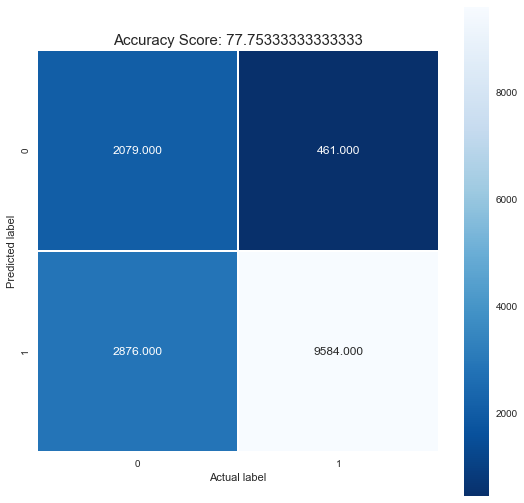


+-------------------------------------------------------------+
| The performance metrics of the above model are as follows:  |
+---------------------------------+---------------------------+
|             Metrics             |           Scores          |
+---------------------------------+---------------------------+
|     Classification_accuracy     |     77.75333333333333     |
|       Classification_error      |     22.246666666666666    |
|          True positive          |            9584           |
|          False positive         |            461            |
|          True negative          |            2079           |
|          False negative         |            2876           |
|        True positive rate       |     76.91813804173356     |
|       False negative rate       |     23.081861958266455    |
|        True negative rate       |     81.85039370078741     |
|       False positive rate       |     18.149606299212596    |
|         Precision value         |    

In [64]:
Confusion_metric(Testy_tfw,TFw2v_Noise_pre,TFw2v_noise_acc)

<h3>Observations</h3>
<ul>
    <li>There is a slight decrease in the accuracy in the model which is ithink due to the small random noise in the dataset</li>
    <li>All the performance metrics are same as compared to the previous model and the best part is that there is no change in the total number of the non negative weights presents in the model.</li>
    <li>So I can conclude that the features are not collinear and let's do some feature importance.</li>


<h3>Finding & Ranking the total number of optimal features present in the model by using the RFECV technique.</h3>

Optimal number of features: 45
Selected features: [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49]
Features sorted by their rank:
[(1, 1), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 47), (1, 48), (1, 49), (2, 4), (3, 0), (4, 46), (5, 16), (6, 8)]


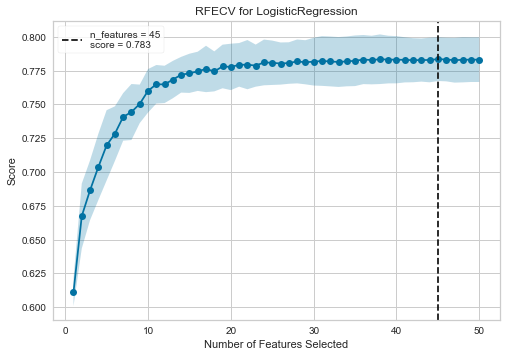

Time taken : 0:13:12.753616


In [70]:
start = datetime.now()
Best=best_TFWparam
Feature_imp(Best,TF_tr_Noise,Trainy_tfw)

print('Time taken :', datetime.now() - start)

<h2>Observations</h2>
<ul>
    <li>After performing the RFECV technique the total number of the optimal features are 45 with an increase of 2.08% in the accuracy.</li>
    <li>The above RFECV plot shows that there is a spike in the accuracy the most important 3 features and the variance of the feature is increasing and maximum after the inclusion of the 45th feature in the list.</li>
    <li>So the above plot gives a very intutive and nice understanding of the nature of the features present in the model.</li> 
        

<h2>Conclusion</h2>
<ol>
    <li>The Bag-of-words vectorizer technique yielded the best accuracy which is 88% after tuning the hyperaparameter as compared to the other vectorizers.</li>
    <li>By changing the regularizers and lambda values from L2 to L1 severe effect of sparsity in the total number of non zero weights are seen and the accuracy of the model also dropped very sharply.</li> 
    <li>After performing the pertubation tests in all the vectorized models there is no sign of multicollinearity seen in the model as the total number of nonzero weights did not changed that much which is a good sign.
    <li>I have shown the feature importance in the Average and Tf-idf weighted word to vectorized models and not shown in the BOW and TF-IDF Vectorized models because the Recursive Feature elimination (RFE) takes a lot of time for the high dimensional data because it has very high time complexity and I was unable to do it because of compute and Time constraints.</li>
    <li>So according to my observations and analysis I can conclude that the Logistic Regression model is very stable and good model as compared with the KNN algorithm.</li>
    <li>Logistic regression model works fairly good with the text data and in this particular scenario it is doing a good job in classiffying the Positive and Negative reviews properly.</li>
    
    
